In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

import random
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm

sns.set(style="whitegrid")
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

Using TensorFlow backend.
C:\Users\User\Pictures\ANACONDA\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu


In [2]:
from tqdm import tqdm
from tqdm import trange
import time
from tqdm import tqdm, tqdm_pandas

tqdm.pandas()

In [3]:
EPOCHS=400
LR=1e-2
BS=16384
SEED=4

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    ## 위에서 random.seed 지정해줬는데 왜 np.random 지정해야하는지 모르겠음!!
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(200)

In [5]:
train_df = pd.read_csv('C:/Users/김승우/Desktop/파이썬/train.csv')
train_df = train_df.drop(columns=['ID'])
val_df = pd.read_csv('C:/Users/김승우/Desktop/파이썬/val.csv')
val_df = val_df.drop(columns=['ID'])

In [6]:
print(train_df.shape)
print(val_df.shape)

(113842, 30)
(28462, 31)


In [11]:
val_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [13]:
X = val_df.drop('Class', axis = 1).values
Y = val_df["Class"]

In [7]:
tsne = TSNE(n_components=2, random_state=0)
X_t3 = tsne.fit_transform(val_df)

C:\Users\User\Pictures\ANACONDA\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Pictures\ANACONDA\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


C:\Users\User\Pictures\ANACONDA\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Pictures\ANACONDA\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


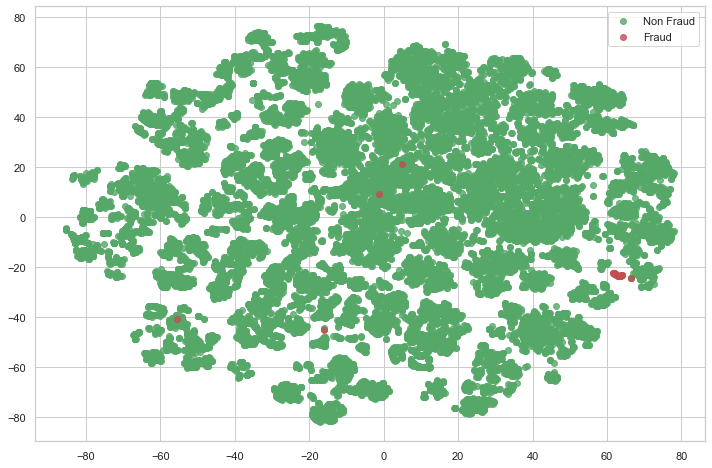

In [15]:
tsne = TSNE(n_components=2, random_state=0)
X_t = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();